In [43]:
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


We will attempt to create a deep learning model to construct a sentence out of a slected text from Marcel Proust's book Swann's Way.  This deep learning model will take a word as input and generate a sentence as output.  Limitations include a reduced sized text due to memory constraints.  In future efforts, we will have to train on more text and increased layers.  We also have to remove the stop words from the text.

In [33]:
print("The current directory is: ", os.getcwd())
import os
os.chdir("/content/gdrive/My Drive/Galvanize Adm/Marcel Proust")
print("The current directory is: ", os.getcwd())

The current directory is:  /content/gdrive/My Drive/Galvanize Adm/Marcel Proust
The current directory is:  /content/gdrive/My Drive/Galvanize Adm/Marcel Proust


In [4]:
# Loading first 20 thousand characters from Swanns Way, not the entire text to save memory space
txt = open('SwannsWay.txt').read()
print(txt[:500])
data = txt[:20000].replace('\n', '')



For a long time I used to go to bed early. Sometimes, when I had put out
my candle, my eyes would close so quickly that I had not even time to
say "I'm going to sleep." And half an hour later the thought that it was
time to go to sleep would awaken me; I would try to put away the book
which, I imagined, was still in my hands, and to blow out the light; I
had been thinking all the time, while I was asleep, of what I had just
been reading, but my thoughts had run into a channel of their own,
unt


In [5]:
len(data)

19695

In [0]:
# We are encoding the text as intergers so our model and read it
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [7]:
len(encoded)

3474

In [68]:
pd.DataFrame(tokenizer.word_counts, index = ['']).T.reset_index()

,index,
0,for,31
1,a,69
2,long,4
3,time,10
4,i,98
5,used,5
6,to,101
7,go,5
8,bed,13
9,early,1


<BarContainer object of 1246 artists>

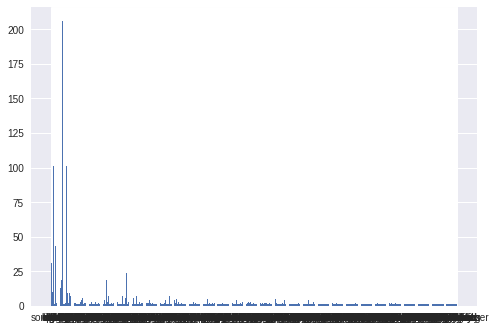

In [55]:
plt.bar(pd.DataFrame(tokenizer.word_counts, index = ['']).T.reset_index()['index'], pd.DataFrame(tokenizer.word_counts, index = ['']).T.reset_index()[''])
plt.show()

In [8]:
# determine the vocabulary size (how name unique words we have in the selected text)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 1247


In [9]:
len(tokenizer.word_index)

1246

In [11]:
# create word -> word sequences
sequences = []
for i in range(1, len(encoded)):
	sequence = encoded[i-1 : i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 3473


In [12]:
len(sequences)

3473

In [0]:
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [14]:
X.shape

(3473,)

In [15]:
y.shape

(3473,)

In [0]:
# one hot encode outputs
y = to_categorical(y, num_classes = vocab_size)

In [17]:
y.shape

(3473, 1247)

In [23]:
# define model, we are using the LSTM model with one hidden layer.  LSTM (Long Short Term Memory) to allow the machine to remember 
# sequence of words and learn the grammar
model = Sequential()

model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(100,  return_sequences = True))

model.add(LSTM(100))

model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 10)             12470     
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 100)            44400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1247)              125947    
Total params: 263,217
Trainable params: 263,217
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
%%time
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 3s - loss: 6.8795 - acc: 0.0564
Epoch 2/100
 - 1s - loss: 5.9429 - acc: 0.0593
Epoch 3/100
 - 1s - loss: 5.7865 - acc: 0.0593
Epoch 4/100
 - 1s - loss: 5.6873 - acc: 0.0587
Epoch 5/100
 - 1s - loss: 5.6225 - acc: 0.0576
Epoch 6/100
 - 1s - loss: 5.5820 - acc: 0.0553
Epoch 7/100
 - 1s - loss: 5.5518 - acc: 0.0582
Epoch 8/100
 - 1s - loss: 5.5203 - acc: 0.0685
Epoch 9/100
 - 1s - loss: 5.4950 - acc: 0.0697
Epoch 10/100
 - 1s - loss: 5.4680 - acc: 0.0760
Epoch 11/100
 - 1s - loss: 5.4407 - acc: 0.0792
Epoch 12/100
 - 1s - loss: 5.4176 - acc: 0.0783
Epoch 13/100
 - 1s - loss: 5.3901 - acc: 0.0763
Epoch 14/100
 - 1s - loss: 5.3686 - acc: 0.0783
Epoch 15/100
 - 1s - loss: 5.3446 - acc: 0.0832
Epoch 16/100
 - 1s - loss: 5.3230 - acc: 0.0904
Epoch 17/100
 - 1s - loss: 5.2981 - acc: 0.0916
Epoch 18/100
 - 1s - loss: 5.2680 - acc: 0.0959
Epoch 19/100
 - 1s - loss: 5.2269 - acc: 0.0970
Epoch 20/100
 - 1s - loss: 5.1806 - acc: 0.0993
Epoch 21/100
 - 1s - loss: 5.1288 - acc: 0.1014
E

In [0]:
# Make a function which takes an input (a word from the selected text, in the case below we selected 'eyes') and then use that to constuct 
# a sentence
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text

	for _ in range(n_words):
		
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = np.array(encoded)
		
		yhat = model.predict_classes(encoded, verbose=0)
		
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		
		in_text, result = out_word, result + ' ' + out_word  
	return result

In [70]:
print(generate_seq(model, tokenizer, 'eyes', 25))   # 25 will dictate the lenght of the sentence we want created

eyes and to the room in the room in the room in the room in the room in the room in the room in the room
